Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [11]:
import pandas as pd
from scipy.stats.contingency import association # cramer
from scipy.stats import pearsonr # pearson
from scipy.stats import  spearmanr # spearman
from sklearn.metrics import matthews_corrcoef # matthews
import seaborn as sns

In [12]:
products = pd.read_csv('foodmart.products.tsv', sep='\t')
sales = pd.read_csv('foodmart.sales.tsv', sep='\t')

In [13]:
merge = pd.merge(products, sales, on='product_id')
merge

,product_class_id,product_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,store_id,date,sales
0,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,7,1997-01-03,4
1,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,13,1997-01-11,3
2,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,17,1997-02-17,3
3,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,24,1997-03-15,3
4,30,1,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,7,1997-04-07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83386,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,16,1997-11-22,3
83387,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,6,1997-12-01,2
83388,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,16,1997-12-05,4
83389,33,1559,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,7,1997-12-19,2


In [14]:
sparse_sales = pd.pivot_table(merge, values='sales', index=['date', 'store_id'],
                     columns=['product_name'], fill_value = 0)

In [15]:
spearman = sparse_sales.corr(method='spearman')
spearman

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.097969,0.001993,0.041981,0.050371,-0.033882,-0.007844,0.077134,0.019108,-0.007614,...,0.033237,0.112359,0.076139,0.018318,0.005265,0.018996,0.018471,0.099764,0.039577,0.018928
Akron City Map,0.097969,1.000000,0.022436,0.098703,0.030165,0.030935,0.031788,-0.002137,0.047911,0.098667,...,0.005623,0.030795,0.039333,-0.001983,-0.053719,0.013590,0.040211,0.022333,0.090423,0.055622
Akron Eyeglass Screwdriver,0.001993,0.022436,1.000000,-0.036888,0.029858,0.076507,-0.005579,0.123704,0.052521,0.088301,...,-0.006781,0.004975,0.059180,0.067207,0.046000,-0.016040,-0.003019,0.040994,-0.001277,0.108524
American Beef Bologna,0.041981,0.098703,-0.036888,1.000000,0.027961,-0.032650,0.027374,-0.016565,-0.041241,0.070463,...,0.009394,0.063805,-0.057211,-0.022645,0.005515,0.092713,-0.007196,0.059298,0.059979,0.040561
American Chicken Hot Dogs,0.050371,0.030165,0.029858,0.027961,1.000000,0.014187,-0.000718,0.051069,0.048408,0.058423,...,0.082403,-0.019304,0.070678,0.071697,0.036806,0.062295,-0.021510,-0.007004,0.105569,0.000033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.018996,0.013590,-0.016040,0.092713,0.062295,-0.015969,0.050453,-0.003126,-0.007714,0.042247,...,-0.032531,-0.053064,-0.007445,-0.002923,0.037459,1.000000,0.015116,0.018770,0.025268,0.013656
Washington Diet Soda,0.018471,0.040211,-0.003019,-0.007196,-0.021510,0.074140,0.053977,0.020414,0.013718,-0.007546,...,-0.039151,0.047079,0.107883,0.088316,-0.019259,0.015116,1.000000,-0.025042,0.014216,-0.039504
Washington Mango Drink,0.099764,0.022333,0.040994,0.059298,-0.007004,0.091507,0.056937,0.021470,0.075320,0.011497,...,-0.028520,-0.024756,-0.003357,0.041751,0.159320,0.018770,-0.025042,1.000000,-0.000819,-0.048897


In [16]:
pearson = sparse_sales.corr(method='pearson')
pearson

product_name,ADJ Rosy Sunglasses,Akron City Map,Akron Eyeglass Screwdriver,American Beef Bologna,American Chicken Hot Dogs,American Cole Slaw,American Corned Beef,American Foot-Long Hot Dogs,American Low Fat Bologna,American Low Fat Cole Slaw,...,Washington Apple Juice,Washington Berry Juice,Washington Cola,Washington Cranberry Juice,Washington Cream Soda,Washington Diet Cola,Washington Diet Soda,Washington Mango Drink,Washington Orange Juice,Washington Strawberry Drink
product_name,,,,,,,,,,,,,,,,,,,,,
ADJ Rosy Sunglasses,1.000000,0.076608,-0.006581,0.038685,0.041105,-0.045887,-0.008466,0.062309,0.033752,-0.009656,...,0.053533,0.072249,0.061736,-0.000735,0.000843,0.028226,0.012653,0.089932,0.072668,0.035745
Akron City Map,0.076608,1.000000,0.026297,0.088709,0.061144,0.039347,0.019767,-0.005998,0.010270,0.078176,...,-0.021793,0.020514,0.051956,-0.001018,-0.032582,0.007142,0.035274,0.033875,0.078070,0.051952
Akron Eyeglass Screwdriver,-0.006581,0.026297,1.000000,-0.040851,0.034345,0.108726,0.007573,0.162355,0.020933,0.074292,...,-0.000237,-0.001297,0.049793,0.055047,0.031202,0.013510,-0.017855,0.022714,0.003156,0.163519
American Beef Bologna,0.038685,0.088709,-0.040851,1.000000,0.014780,-0.039118,-0.007890,-0.008264,-0.045949,0.085975,...,0.000197,0.081151,-0.053404,-0.021832,0.003286,0.090774,-0.031954,0.043843,0.080638,0.055211
American Chicken Hot Dogs,0.041105,0.061144,0.034345,0.014780,1.000000,-0.005336,0.017765,0.057972,0.071549,0.052460,...,0.098935,-0.024224,0.066212,0.043765,0.077541,0.045038,-0.037246,0.025975,0.129795,-0.008498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Diet Cola,0.028226,0.007142,0.013510,0.090774,0.045038,-0.019134,0.065257,0.008475,-0.014765,0.040917,...,-0.021486,-0.048885,-0.024276,0.014478,0.023574,1.000000,0.018490,0.047577,0.005696,0.027834
Washington Diet Soda,0.012653,0.035274,-0.017855,-0.031954,-0.037246,0.080757,0.066493,0.034888,-0.001253,0.008366,...,-0.025958,0.037920,0.111450,0.090849,0.023312,0.018490,1.000000,-0.030056,0.009293,-0.046996
Washington Mango Drink,0.089932,0.033875,0.022714,0.043843,0.025975,0.087489,0.068372,0.028454,0.080489,0.013144,...,-0.020503,-0.031946,-0.026589,0.026534,0.116748,0.047577,-0.030056,1.000000,0.014672,-0.051093


In [21]:
max_pearson = pearson['American Chicken Hot Dogs'].drop('American Chicken Hot Dogs').idxmax()
max_spearman = spearman['American Chicken Hot Dogs'].drop('American Chicken Hot Dogs').idxmax()
print(max_pearson, max_spearman)

Mighty Good Monthly Home Magazine Great Cranberry Muffins


<Axes: xlabel='Mighty Good Monthly Home Magazine', ylabel='American Chicken Hot Dogs'>

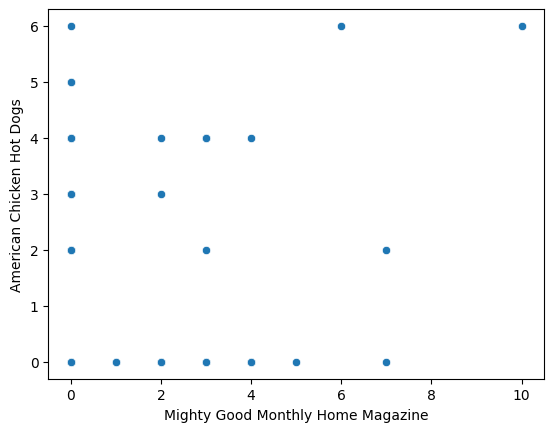

In [22]:
sns.scatterplot(x=sparse_sales[max_pearson], y=sparse_sales['American Chicken Hot Dogs'])

<Axes: xlabel='Great Cranberry Muffins', ylabel='American Chicken Hot Dogs'>

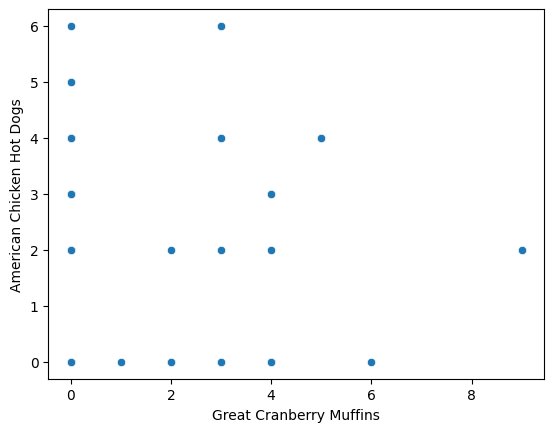

In [23]:
sns.scatterplot(x=sparse_sales[max_spearman], y=sparse_sales['American Chicken Hot Dogs'])

<Axes: xlabel='date', ylabel='American Chicken Hot Dogs'>

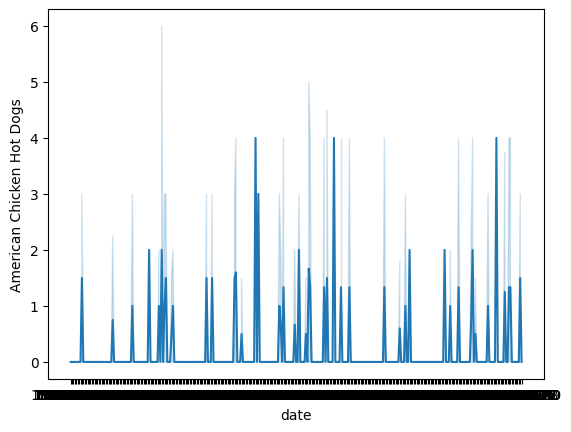

In [24]:
sns.lineplot(sparse_sales, x='date', y='American Chicken Hot Dogs')

<Axes: xlabel='date', ylabel='Mighty Good Monthly Home Magazine'>

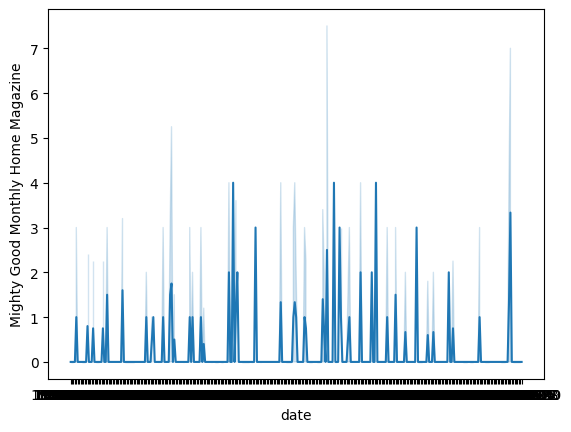

In [25]:
sns.lineplot(sparse_sales, x='date', y=max_pearson)

<Axes: xlabel='date', ylabel='Great Cranberry Muffins'>

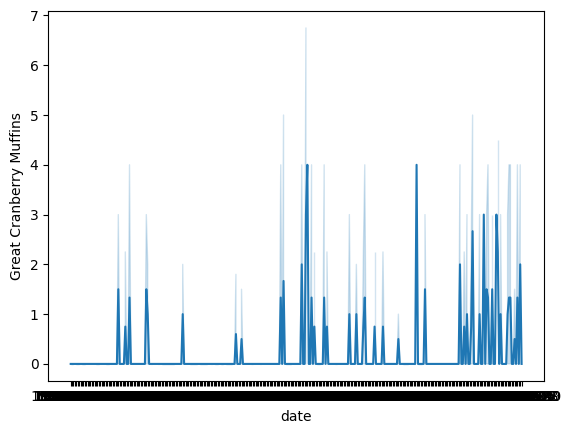

In [27]:
sns.lineplot(sparse_sales, x='date', y=max_spearman)

In [28]:
matthew_corr = matthews_corrcoef(products['recyclable_package'], products['low_fat'])
matthew_corr

np.float64(-0.02675542252327238)

<Axes: xlabel='recyclable_package', ylabel='Count'>

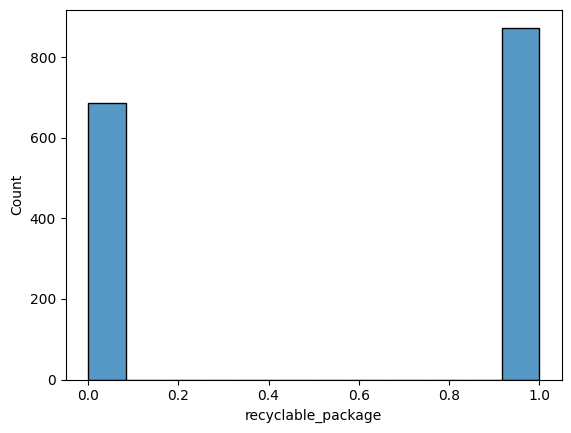

In [29]:
sns.histplot(products['recyclable_package'])

<Axes: xlabel='low_fat', ylabel='Count'>

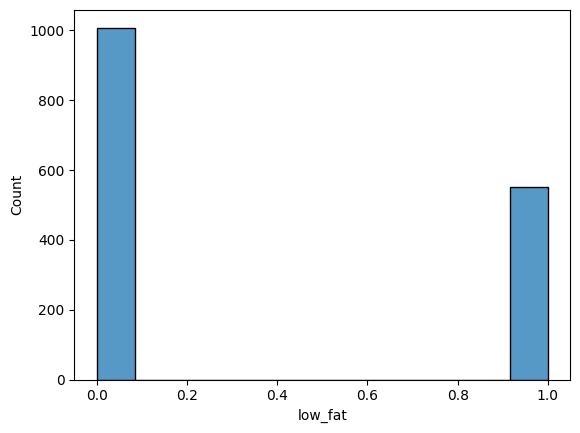

In [30]:
sns.histplot(products['low_fat'])

In [32]:
contingency_table = pd.crosstab(merge['store_id'], merge['brand_name'])
cramer = association(contingency_table)
cramer

0.0343024046787291

<Axes: xlabel='brand_name', ylabel='store_id'>

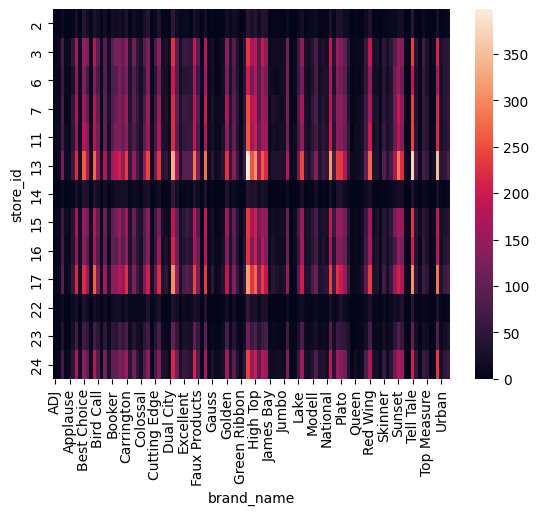

In [35]:
sns.heatmap(contingency_table)